**Predicting music genre through microphone**

In this notebook, the CNN model created in the previous notebook will be used to predict the genre of music being played into a microphone. At the end of the previous notebook, the model was used to predict several songs from the test set as well as for other audio samples downloaded separately. 
Here, PyAudio is used to get data from the microphone. It records sound for 3 seconds, creates a .wav file, and uses the model to predict the genre based on the sound during that 3 second interval. This is repeated and the barplot is updated every time a new classification is made.

Check out the genre_classify_mic.py file to run this code with a matplotlib plot of all the genre scores that updates as classifications are made.

In [17]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import math, random, pickle, os, operator
from tempfile import TemporaryFile

from scipy.io import wavfile
from python_speech_features import mfcc
import librosa
import librosa.display
import IPython.display as ipd
import pyaudio
import time
import wave

from IPython import display
import pylab as pl

%matplotlib inline

In [18]:
#load model
model = tf.keras.models.load_model("model80.h5")

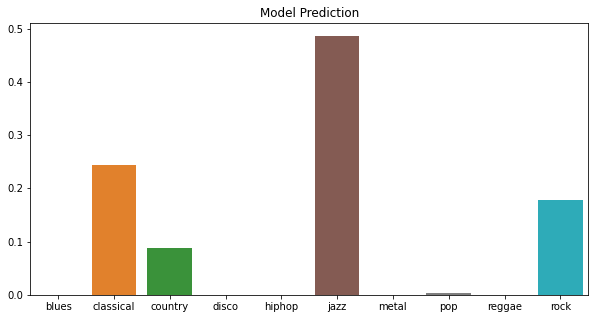

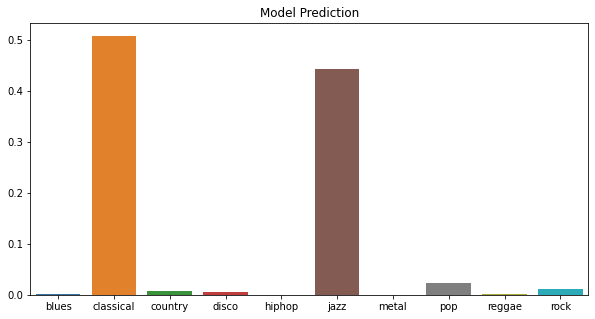

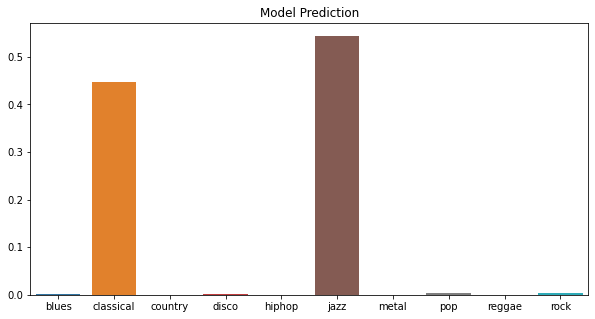

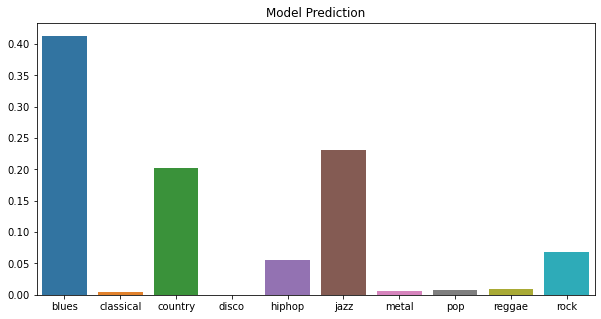

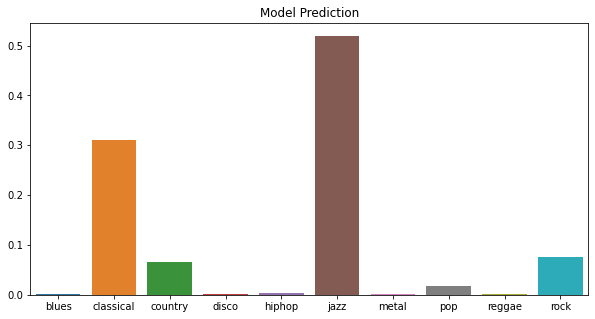

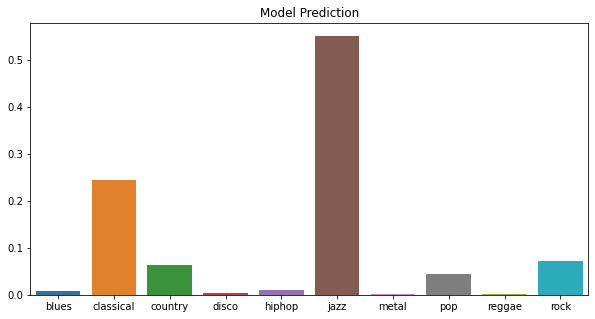

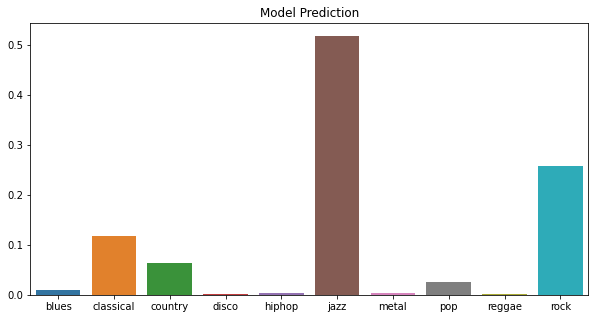

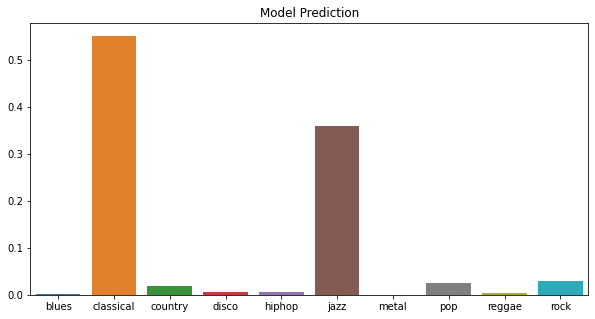

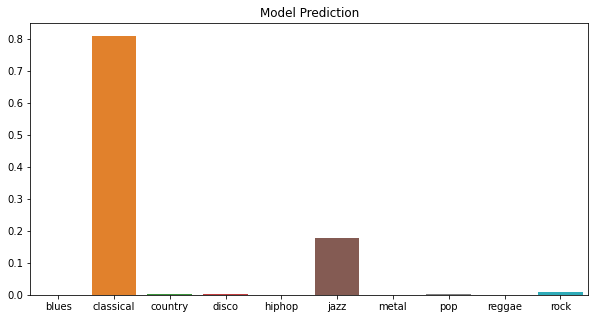

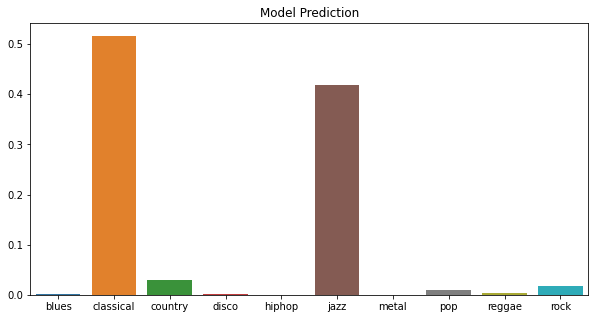

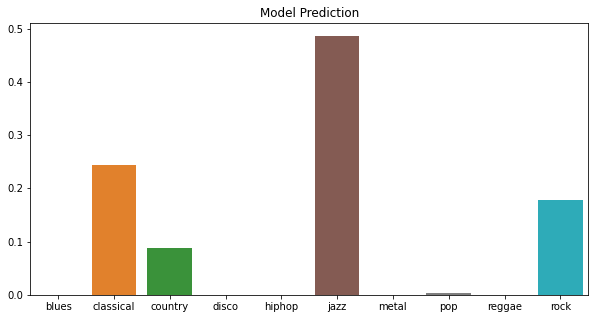

In [23]:
FORMAT = pyaudio.paInt16
CHANNELS = 2
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 3
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)


#loop for recording 3 second samples from microphone and classifying genre
for _ in range(10):
    # print("recording...")
    frames = []
    
    for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
        data = stream.read(CHUNK)
        frames.append(data)
    # print("finished recording")

    # classify frames
    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

    t, rate = librosa.load("./file.wav", duration=3) # returns sample rate and data (sig)
    audio_spect = librosa.feature.melspectrogram(t, rate) # convert to melspectogram

    genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
    genres = genres.split()

    spect = audio_spect.reshape(1,128,130,1) / 255.0
    plt.figure(figsize=(10,5))
    sns.barplot(x=genres,y=model.predict(spect)[0])
    plt.title("Model Prediction");
    display.clear_output(wait=True)
    display.display(pl.gcf())

 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()



